In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
os.getcwd()

'/Users/eswara'

In [4]:
os.chdir('/Users/eswara/Downloads')

In [5]:
train_df = pd.read_csv('cs-training.csv')
test_df = pd.read_csv('cs-test.csv')

In [6]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [8]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
#Age
train_df.age.median()

52.0

In [10]:
train_df.loc[train_df["age"]== 0,"age"]= train_df.age.median()

In [11]:
train_df.groupby('age')['age'].count()

age
21     183
22     434
23     641
24     816
25     953
      ... 
102      3
103      3
105      1
107      1
109      2
Name: age, Length: 85, dtype: int64

In [12]:
#DebtRatio
train_df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

We noticed outlier from our analysis, we need to remove outliers. Based above, we see the jump from 75% to maximum.


In [13]:
debtr_iqr=train_df.DebtRatio.quantile(0.75)-train_df.DebtRatio.quantile(0.25)
print(debtr_iqr*1.5)

1.0397699114999999


In [14]:
quantiles = [0.75,0.8,0.9,0.95,0.975,0.99]
for i in quantiles:
    print(i*100,'% quantile of debt ratio is:',train_df.DebtRatio.quantile(i))

75.0 % quantile of debt ratio is: 0.86825377325
80.0 % quantile of debt ratio is: 4.0
90.0 % quantile of debt ratio is: 1267.0
95.0 % quantile of debt ratio is: 2449.0
97.5 % quantile of debt ratio is: 3489.024999999994
99.0 % quantile of debt ratio is: 4979.040000000037


We can consider 99% for this case. And see how the Monthly come and default looks

In [15]:
train_df.loc[train_df["DebtRatio"] > train_df.DebtRatio.quantile(0.99)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,1500.000000,85.000000,1500.000000
mean,8624.660667,0.094118,0.074667
std,16912.949834,0.293725,0.262940
min,4983.000000,0.000000,0.000000
25%,5470.000000,0.000000,0.000000
50%,6187.000000,0.000000,0.000000
75%,7805.250000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [16]:
train_df.loc[train_df["DebtRatio"] > train_df.DebtRatio.quantile(0.99)].groupby('MonthlyIncome')['DebtRatio'].count()

MonthlyIncome
0.0    77
1.0     8
Name: DebtRatio, dtype: int64

Only 85 has monthly income( 77 has 0 income and 12 as income 1). And rest of the 1415 has no data of income. Looking at 0 and 1 it seems it was data entry issue of values from SeriousDlqin2yrs. Anyways, since their default rate is also low we can remove them as outliers.

In [17]:
drop_df = (train_df['DebtRatio'] > train_df.DebtRatio.quantile(0.99))
train_df=train_df[-drop_df]

In [18]:
train_df['DebtRatio'].describe()

count    148500.000000
mean        269.452999
std         780.439511
min           0.000000
25%           0.172928
50%           0.362295
75%           0.818593
max        4979.000000
Name: DebtRatio, dtype: float64

In [19]:
#MonthlyIncome
train_df['MonthlyIncome'].info()

<class 'pandas.core.series.Series'>
Int64Index: 148500 entries, 0 to 149999
Series name: MonthlyIncome
Non-Null Count   Dtype  
--------------   -----  
120184 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


We also noticed in the prelimiary analysis that, MonthlyIncome has missing values. Since or data is skewed and has outliers we use the median to replace the missing values.

In [22]:
train_df['MonthlyIncome'].mean()

6674.93867736138

In [23]:
train_df['MonthlyIncome'].median()

5400.0

In [24]:
train_df["MonthlyIncome"]=train_df["MonthlyIncome"].fillna(train_df['MonthlyIncome'].median())

In [25]:
train_df["MonthlyIncome"] = train_df["MonthlyIncome"].astype('int64')

In [26]:
#Checking dataframe now
train_df['MonthlyIncome'].info()

<class 'pandas.core.series.Series'>
Int64Index: 148500 entries, 0 to 149999
Series name: MonthlyIncome
Non-Null Count   Dtype
--------------   -----
148500 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


In [27]:
train_df['NumberOfDependents'].info()

<class 'pandas.core.series.Series'>
Int64Index: 148500 entries, 0 to 149999
Series name: NumberOfDependents
Non-Null Count   Dtype  
--------------   -----  
144658 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


Number of Dependents has missing values so we replace this with mode.

In [28]:
train_df["NumberOfDependents"].mode()

0    0.0
Name: NumberOfDependents, dtype: float64

In [29]:
train_df["NumberOfDependents"] = train_df["NumberOfDependents"].fillna(0)

In [30]:
train_df["NumberOfDependents"].describe()

count    148500.000000
mean          0.739333
std           1.107666
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

Based on the distribution let us cap the number of dependents at 6

In [31]:
train_df.loc[(train_df["NumberOfDependents"] >=6),"NumberOfDependents"]=6

In [32]:
train_df["NumberOfDependents"].describe()

count    148500.000000
mean          0.738290
std           1.101117
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: NumberOfDependents, dtype: float64

In [33]:
train_df.NumberOfDependents.value_counts()

0.0    89734
1.0    26174
2.0    19368
3.0     9401
4.0     2837
5.0      741
6.0      245
Name: NumberOfDependents, dtype: int64

**Late Payment features**

In [34]:
train_df[['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse',
                                        'NumberOfTimes90DaysLate']].describe()

,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,148500.000000,148500.000000,148500.000000
mean,0.242323,0.421737,0.268182
std,4.175988,4.213000,4.190102
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [35]:
N_30to59Days = pd.crosstab(train_df['NumberOfTime30-59DaysPastDueNotWorse'], train_df['SeriousDlqin2yrs'])
N_30to59Days['perc'] = N_30to59Days[1]*100/(N_30to59Days[0]+N_30to59Days[1])
N_30to59Days

SeriousDlqin2yrs,0,1,perc
NumberOfTime30-59DaysPastDueNotWorse,,,
0,119828,4993,4.000128
1,13470,2381,15.021134
2,3332,1202,26.510807
3,1116,610,35.341831
4,420,314,42.779292
5,179,148,45.259939
6,66,73,52.517986
7,26,28,51.851852
8,17,8,32.000000


In [36]:
N_60to89Days = pd.crosstab(train_df['NumberOfTime60-89DaysPastDueNotWorse'], train_df['SeriousDlqin2yrs'])
N_60to89Days['perc'] = N_60to89Days[1]*100/(N_60to89Days[0]+N_60to89Days[1])
N_60to89Days

SeriousDlqin2yrs,0,1,perc
NumberOfTime60-89DaysPastDueNotWorse,,,
0,133793,7165,5.083074
1,3916,1761,31.019905
2,554,558,50.179856
3,138,179,56.466877
4,40,64,61.538462
5,13,21,61.764706
6,4,12,75.000000
7,4,5,55.555556
8,1,1,50.000000


In [37]:
train_df[train_df['NumberOfTimes90DaysLate']>=96][['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse',
                                        'NumberOfTimes90DaysLate']].describe()

,SeriousDlqin2yrs,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


In [38]:
N_90Days = pd.crosstab(train_df['NumberOfTimes90DaysLate'], train_df['SeriousDlqin2yrs'])
N_90Days['perc'] = N_90Days[1]*100/(N_90Days[0]+N_90Days[1])
N_90Days

SeriousDlqin2yrs,0,1,perc
NumberOfTimes90DaysLate,,,
0,133749,6456,4.604686
1,3455,1758,33.723384
2,775,774,49.967721
3,281,383,57.680723
4,95,194,67.128028
5,48,82,63.076923
6,32,48,60.000000
7,7,30,81.081081
8,6,15,71.428571


The customers who delayed 96 and 98 times has significantly high defualt rate of 54%. So replace the 96 and 98 times users with maximum value.

In [39]:
train_df.loc[(train_df["NumberOfTime30-59DaysPastDueNotWorse"] >=13),"NumberOfTime30-59DaysPastDueNotWorse"]=13
train_df.loc[(train_df["NumberOfTime60-89DaysPastDueNotWorse"] >=11),"NumberOfTime60-89DaysPastDueNotWorse"]=11
train_df.loc[(train_df["NumberOfTimes90DaysLate"] >=17),"NumberOfTimes90DaysLate"]=17


**RevolvingUtilizationOfUnsecuredLines**

In [40]:
train_df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    148500.000000
mean          6.027165
std         250.010094
min           0.000000
25%           0.029743
50%           0.153416
75%           0.558236
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [41]:
quantiles = [0.75,0.8,0.9,0.95,0.975,0.99]

for i in quantiles:
    print(i*100,'% quantile of RUUL ratio is: ',train_df.RevolvingUtilizationOfUnsecuredLines.quantile(i))

75.0 % quantile of RUUL ratio is:  0.55823570625
80.0 % quantile of RUUL ratio is:  0.6985532324000002
90.0 % quantile of RUUL ratio is:  0.9820186667
95.0 % quantile of RUUL ratio is:  0.9999999
97.5 % quantile of RUUL ratio is:  0.9999999
99.0 % quantile of RUUL ratio is:  1.0938126188200001


In [42]:
quantiles = [0.991,0.9925,0.9950,0.9975,0.9980,0.9985,0.9990,0.9995]

for i in quantiles:
    print(i*100,'% quantile of RUUL ratio is: ',train_df.RevolvingUtilizationOfUnsecuredLines.quantile(i))

99.1 % quantile of RUUL ratio is:  1.115544896105
99.25 % quantile of RUUL ratio is:  1.1640897036700018
99.5 % quantile of RUUL ratio is:  1.3685688126550029
99.75 % quantile of RUUL ratio is:  1.9872273502125077
99.8 % quantile of RUUL ratio is:  2.716597074972116
99.85000000000001 % quantile of RUUL ratio is:  75.1423461567922
99.9 % quantile of RUUL ratio is:  1570.5010000000184
99.95 % quantile of RUUL ratio is:  3587.7604999998875


In [43]:
quantiles = [0.9981,0.9982,0.9983,0.9984,0.9985]

for i in quantiles:
    print(i*100,'% quantile of RUUL ratio is: ',train_df.RevolvingUtilizationOfUnsecuredLines.quantile(i))

99.81 % quantile of RUUL ratio is:  3.2361691661918637
99.82 % quantile of RUUL ratio is:  3.6313660115105892
99.83 % quantile of RUUL ratio is:  4.418485675000987
99.83999999999999 % quantile of RUUL ratio is:  8.700904502933277
99.85000000000001 % quantile of RUUL ratio is:  75.1423461567922


There is significant jump and breaking of pattern at 99.84%

In [44]:
train_df[train_df['RevolvingUtilizationOfUnsecuredLines']>8.700904502933277][["RevolvingUtilizationOfUnsecuredLines","SeriousDlqin2yrs"]].describe()

,RevolvingUtilizationOfUnsecuredLines,SeriousDlqin2yrs
count,238.000000,238.000000
mean,3559.872350,0.067227
std,5144.000538,0.250942
min,8.851852,0.000000
25%,942.250000,0.000000
50%,1997.000000,0.000000
75%,4108.500000,0.000000
max,50708.000000,1.000000


Although they owe significant amounts, the 238 individuals exhibit low instances of default(only 6.7%), raising the possibility of another error in the data. Even if this isn't an error, incorporating these figures could introduce substantial bias and variability into our ultimate predictions. Hence, the best way is to eliminate these data points.

In [45]:
train_df=train_df[train_df['RevolvingUtilizationOfUnsecuredLines']<=8.700904502933277]

In [46]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,148262.000000,148262.000000,148262.000000,148262.000000,148262.000000,148262.000000,1.482620e+05,148262.000000,148262.000000,148262.000000,148262.000000,148262.000000
mean,75013.731111,0.066760,0.322296,52.275526,0.267958,269.217883,6.429859e+03,8.415231,0.121596,0.999170,0.084803,0.738416
std,43307.183072,0.249607,0.366016,14.807628,0.882118,780.044311,1.296229e+04,5.125120,0.868383,1.102765,0.570454,1.101232
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37519.250000,0.000000,0.029665,41.000000,0.000000,0.172852,3.893000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75026.500000,0.000000,0.152580,52.000000,0.000000,0.362213,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112514.750000,0.000000,0.555233,63.000000,0.000000,0.817342,7.425000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,8.599600,109.000000,13.000000,4979.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,6.000000


###### Correlation matrix

<AxesSubplot:>

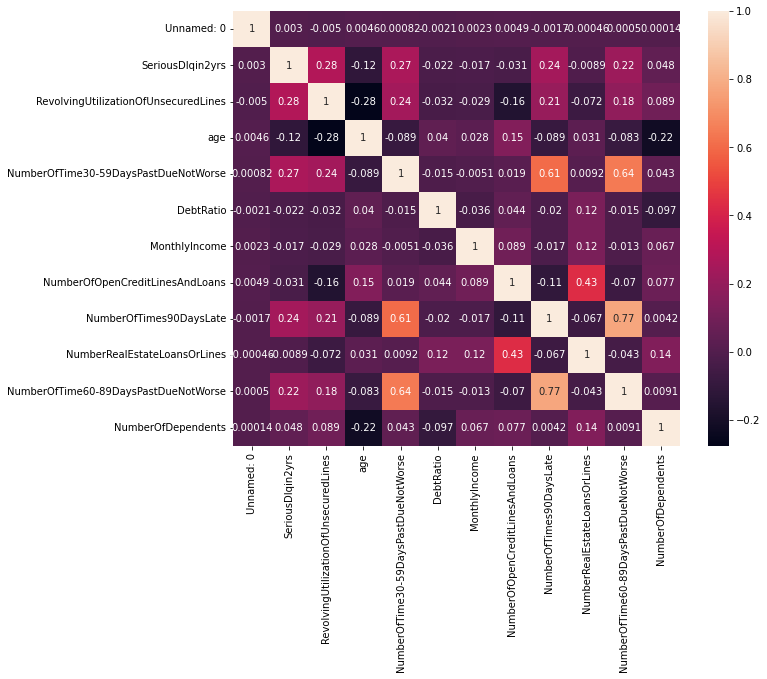

In [47]:
corr = train_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

**Findings:** There is a high correlation among NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse and NumberOfTime30-59DaysPastDueNotWorse. Including all these features wouldn't enhance the predictive capability of algorithms due to the risk of multicollinearity.

We can drop the other 2 features and keep 1 or combine the three features and make a binary feature that classify if a cosumer defaulted any loan/credit payment. 

Furthermore, NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines shows a certain degree of correlation with each other.

In [48]:
train_df["CombinedDefault"] =(train_df["NumberOfTimes90DaysLate"] + train_df["NumberOfTime60-89DaysPastDueNotWorse"])\
+ train_df["NumberOfTime30-59DaysPastDueNotWorse"]

In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148262 entries, 0 to 149999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            148262 non-null  int64  
 1   SeriousDlqin2yrs                      148262 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  148262 non-null  float64
 3   age                                   148262 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  148262 non-null  int64  
 5   DebtRatio                             148262 non-null  float64
 6   MonthlyIncome                         148262 non-null  int64  
 7   NumberOfOpenCreditLinesAndLoans       148262 non-null  int64  
 8   NumberOfTimes90DaysLate               148262 non-null  int64  
 9   NumberRealEstateLoansOrLines          148262 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  148262 non-null  int64  
 11  

In [50]:
train_df.CombinedDefault.value_counts()

0     118273
1      17024
2       5874
3       2852
4       1575
5        923
6        585
7        377
41       269
8        194
9        124
10        70
11        52
13        19
12        18
14        13
15         9
17         4
16         4
19         2
18         1
Name: CombinedDefault, dtype: int64

In [51]:
train_df["CombinedCreditLoans"]=train_df["NumberOfOpenCreditLinesAndLoans"]+train_df["NumberRealEstateLoansOrLines"]

In [52]:
train_df["MonthlyDebtPayment"] = train_df["DebtRatio"] * train_df["MonthlyIncome"]
train_df["MonthlyDebtPayment"] = train_df["MonthlyDebtPayment"].astype('int64')

In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148262 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            148262 non-null  int64  
 1   SeriousDlqin2yrs                      148262 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  148262 non-null  float64
 3   age                                   148262 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  148262 non-null  int64  
 5   DebtRatio                             148262 non-null  float64
 6   MonthlyIncome                         148262 non-null  int64  
 7   NumberOfOpenCreditLinesAndLoans       148262 non-null  int64  
 8   NumberOfTimes90DaysLate               148262 non-null  int64  
 9   NumberRealEstateLoansOrLines          148262 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  148262 non-null  int64  
 11  

In [54]:
train_df_new=train_df[["SeriousDlqin2yrs",'RevolvingUtilizationOfUnsecuredLines','age',
               'NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfDependents',
               'CombinedDefault','CombinedCreditLoans']]

<AxesSubplot:>

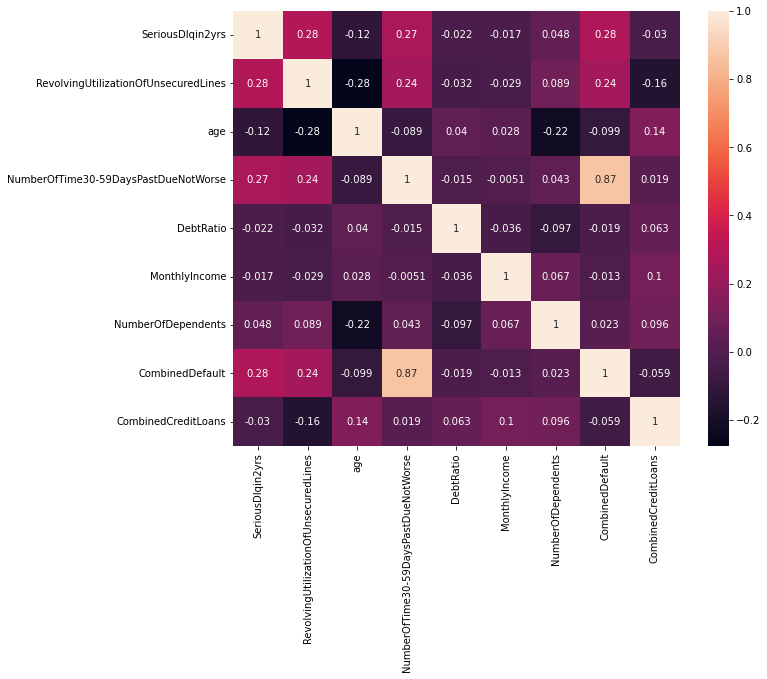

In [55]:
corr = train_df_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2g")

In [56]:
train_df_new

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfDependents,CombinedDefault,CombinedCreditLoans
0,1,0.766127,45,2,0.802982,9120,2.0,2,19
1,0,0.957151,40,0,0.121876,2600,1.0,0,4
2,0,0.658180,38,1,0.085113,3042,0.0,2,2
3,0,0.233810,30,0,0.036050,3300,0.0,0,5
4,0,0.907239,49,1,0.024926,63588,0.0,1,8
...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100,0.0,0,5
149996,0,0.299745,44,0,0.716562,5584,2.0,0,5
149997,0,0.246044,58,0,3870.000000,5400,0.0,0,19
149998,0,0.000000,30,0,0.000000,5716,0.0,0,4
